## Creating multiple linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Input data

In [3]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [7]:
def normalize(x):
    mean_value = np.mean(x)
    min_value = np.min(x)
    max_value = np.max(x)

    diff = max_value - min_value

    temp_list = [(i-mean_value)/(diff) for i in x]

    return temp_list

In [9]:
normalize([x[0] for x in X_train])

[0.516506922257721, -0.0330138445154419, -0.48349307774227895]

### Create Cost function

In [16]:
def compute_cost(x,y,w,b):
    predicted_y = np.dot(x,w) + b

    total_cost = 0
    for i in range(len(x)):

        error_i = predicted_y[i] - y[i]
        error_sq = error_i**2

        total_cost += error_sq/len(x)

    return total_cost

### Create Gradient Descent

In [ ]:
def compute_gradient(x,y,w,b):

    predicted_y = np.dot(x,w) + b

    updated_w = 0
    updated_b = 0

    for i in range(len(x)):
        temp_w = ((predicted_y[i] - y[i]) * x[i])/ len(x)
        temp_b = (predicted_y[i] - y[i]) / len(x)

        updated_w += temp_w
        updated_b += temp_b

    return updated_w, updated_b

In [17]:
def compute_gradient(x,y,w,b):

    predicted_y = np.dot(x,w) + b

    gradient_w = np.zeros(len(x[0]))
    gradient_b = 0

    for i in range(len(x)):

        for j in range(len(x[i])):
            temp_w = ((predicted_y[i] - y[i])*x[i][j])/len(x)
            gradient_w[j] += temp_w

        temp_b = (predicted_y[i] - y[i])/len(x)
        gradient_b += temp_b

    return gradient_w, gradient_b


### Result

In [62]:
w = np.zeros(len(X_train[0]))
b = 0

alpha = 5.0e-7

thresh = 1000000

count = 0

cost_journey = []
w_journey = []
b_journey = []

while True:
    temp_cost = compute_cost(X_train,y_train,w,b)

    cost_journey.append(temp_cost)
    w_journey.append(w)
    b_journey.append(b)

    if temp_cost < 1:
        print(f'Iteration number : {count}')
        print(f'Cost function result: {temp_cost}')
        print(f'Weight: {w}')
        print(f'Bias: {b}')
        break

    grad_w, grad_b = compute_gradient(X_train,y_train,w,b)

    w = w - alpha * grad_w

    b = b - alpha * grad_b 

    if count > thresh:
        print(f'Iteration number : {count}')
        print(f'Cost function result: {temp_cost}')
        print(f'Weight: {w}')
        print(f'Bias: {b}')
        break

    count += 1       

Iteration number : 1000001
Cost function result: 910.1495466570042
Weight: [ 0.23379653  2.63288787 -7.41313224 -1.24930334]
Bias: 0.08736090655326632


In [63]:
for i in range(len(X_train)):
    print(f"prediction: {np.dot(X_train[i], w) + b:0.2f}, target value: {y_train[i]}")

prediction: 441.53, target value: 460
prediction: 274.24, target value: 232
prediction: 153.41, target value: 178


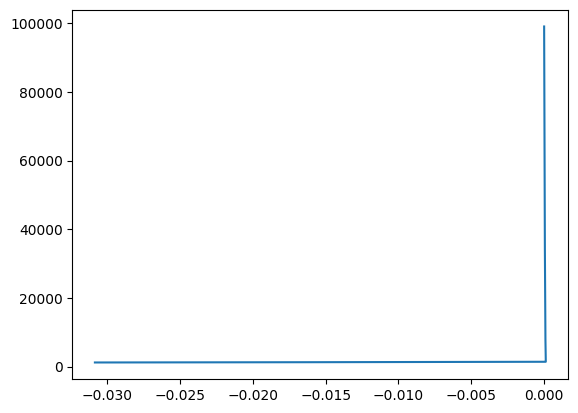

In [37]:
plt.plot(b_journey,cost_journey)

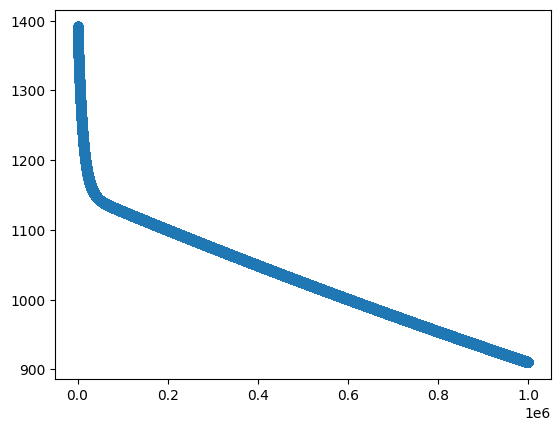

In [64]:
plt.scatter(range(len(cost_journey[100:])),cost_journey[100:])

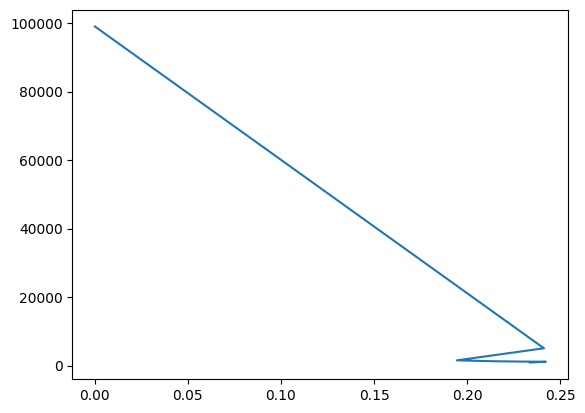

In [65]:
plt.plot([x[0] for x in w_journey],cost_journey)

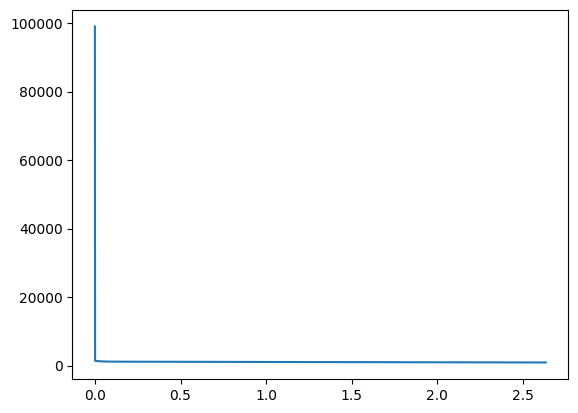

In [66]:
plt.plot([x[1] for x in w_journey],cost_journey)

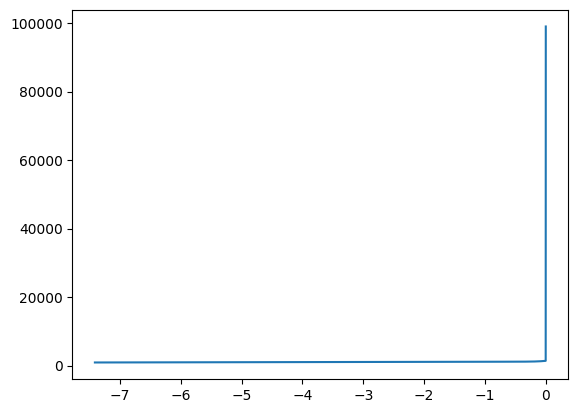

In [67]:
plt.plot([x[2] for x in w_journey],cost_journey)

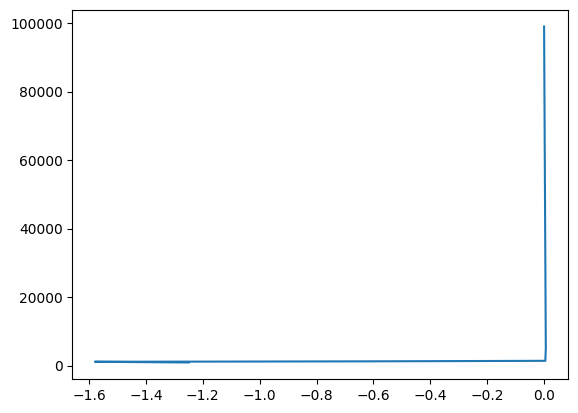

In [68]:
plt.plot([x[3] for x in w_journey],cost_journey)